# Custo de Locação vs. Índice de Progresso Social

A seguir, há uma análise simples feita sobre um pequeno conjunto de dados relacionando o custo de locação por m² das cidades observadas pelo FIPEZAP em agosto de 2025 com o IPS de cada uma, também mensurado em 2025.

Observa-se a partir da análise que algumas capitais nordestinas tem um custo de locação elevado apesar de baixo IPS, com destaque (negativo) nesse sentido para Recife (PE) e Belém (PA). Em Barueri (SP) vê-se o custo de locação por m² mais alto, mas um IPS comparável ao São José do Rio Preto (SP), que tem um custo de locação inferior à metade do seu. Ribeirão Preto (SP), Campo Grande (MS) e Curitiba (PR) se apresentaram como cidades com o melhor "custo-benefício" ao atribuírmos pesos iguais para o custo do m² e IPS na comparação.  

## Importando Dependências

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

## Carregando Dados

In [12]:
df = pd.read_csv("moradia-fipezap-locacao-vs-ips.csv")

## Normalizando Dados

In [13]:
df["IPS_norm"] = (df["IPS (2025)"] - df["IPS (2025)"].min()) / (df["IPS (2025)"].max() - df["IPS (2025)"].min())

df["Affordability"] = 1 - (df["R$/m² (Ago. 2025)"] - df["R$/m² (Ago. 2025)"].min()) / (
    df["R$/m² (Ago. 2025)"].max() - df["R$/m² (Ago. 2025)"].min()
)

## Atribuindo Score de Custo-Benefício Às Cidades 

In [14]:
w_ips, w_afford = 0.5, 0.5  # adjust to your liking!
df["Score"] = w_ips * df["IPS_norm"] + w_afford * df["Affordability"]

df_sorted = df.sort_values("Score", ascending=False).reset_index(drop=True)

## Resultados

In [25]:
print("10 cidades com melhor custo-benefício:")
display(df_sorted.head(10)[["Cidade", "R$/m² (Ago. 2025)", "IPS (2025)", "Score"]])

print("10 cidades com pior custo-benefício:")
display(df_sorted.tail(10)[["Cidade", "R$/m² (Ago. 2025)", "IPS (2025)", "Score"]])

10 cidades com melhor custo-benefício:


,Cidade,R$/m² (Ago. 2025),IPS (2025),Score
0,Ribeirão Preto,30.56,69.57,0.881327
1,Campo Grande,37.39,69.63,0.814219
2,Curitiba,44.71,69.89,0.753932
3,São Bernardo do Campo,35.88,68.34,0.753150
4,Pelotas,20.93,65.40,0.733056
5,Teresina,24.43,65.76,0.718242
6,Joinville,35.65,67.70,0.717480
7,Aracaju,25.82,65.73,0.702075
8,São José do Rio Preto,28.76,66.12,0.694840
9,Goiânia,42.45,68.21,0.677437


10 cidades com pior custo-benefício:


,Cidade,R$/m² (Ago. 2025),IPS (2025),Score
26,Praia Grande,42.63,64.27,0.441329
27,São José,44.20,63.94,0.405464
28,Vitória,49.03,64.65,0.397696
29,São Luís,55.21,64.27,0.311155
30,Manaus,49.47,63.19,0.306342
31,Barueri,69.25,66.54,0.300832
32,Salvador,48.21,62.05,0.251603
33,Recife,59.83,63.33,0.207463
34,Maceió,52.53,61.48,0.173013
35,Belém,59.40,62.33,0.152460


### Dispersão

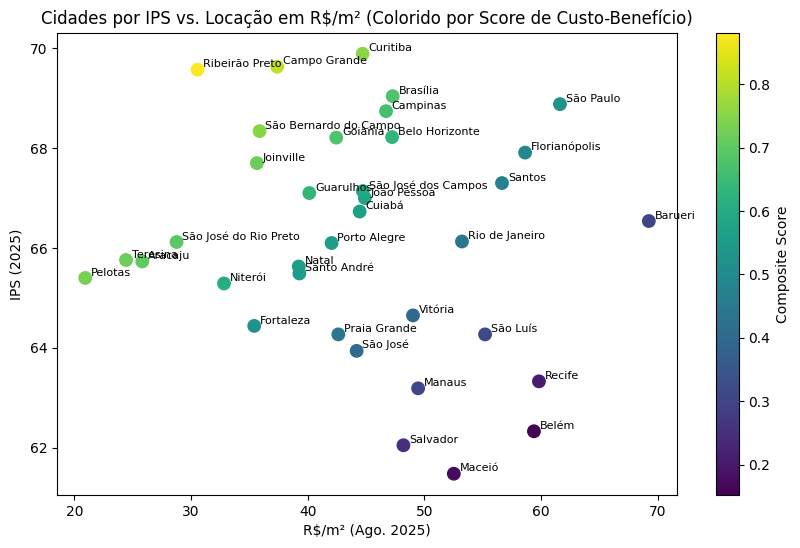

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(df["R$/m² (Ago. 2025)"], df["IPS (2025)"], c=df["Score"], cmap="viridis", s=80)
for i, row in df.iterrows():
    plt.text(row["R$/m² (Ago. 2025)"]+0.5, row["IPS (2025)"]+0.05, row["Cidade"], fontsize=8)
plt.xlabel("R$/m² (Ago. 2025)")
plt.ylabel("IPS (2025)")
plt.title("Cidades por IPS vs. Locação em R$/m² (Colorido por Score de Custo-Benefício)")
plt.colorbar(label="Composite Score")
plt.show()